In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv('C:/Users/Eduardo Fernandes/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
#dropando as categorias e o índice para o modelo
x = df.drop(['CustomerID', 'Gender'], axis=1)

<Figure size 720x360 with 0 Axes>

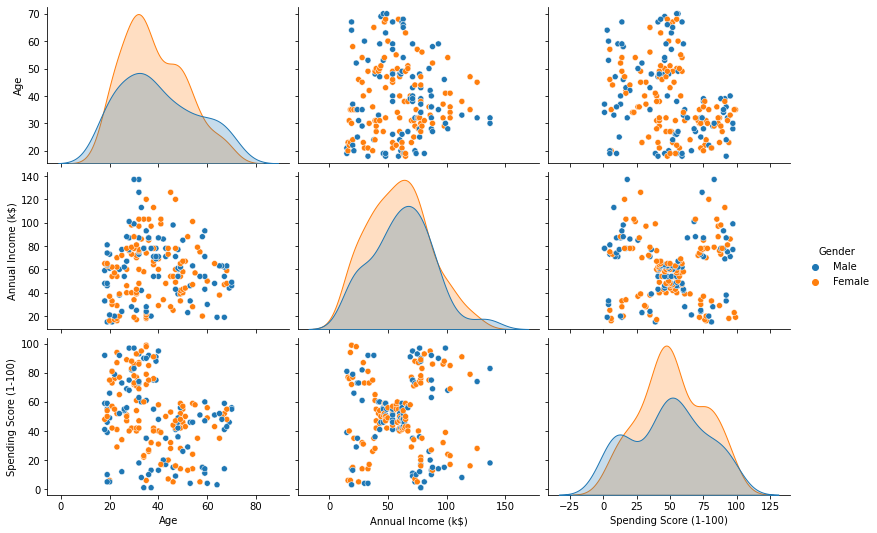

In [12]:
#pares de gráficos com a distriuição dos dados em torno do genêro
plt.figure(figsize=(10,5))
sea.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [14]:
#definindo o espaço para x possiveis números de clusters que o modelo irá trabalhar
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

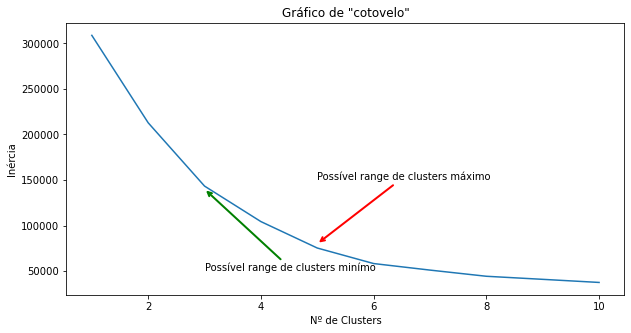

In [17]:
#o gráfico de "cotovelo" nos aponta com quantos clusters nosso modelo possivelmente irá responder melhor
fig, ax = plt.subplots(figsize=(10, 5))
sea.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Gráfico de "cotovelo"')
ax.set_xlabel('Nº de Clusters')
ax.set_ylabel('Inércia')

#apontamento do número de clusters
ax.annotate('Possível range de clusters minímo', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2))

ax.annotate('Possível range de clusters máximo', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

In [18]:
#pela curva do cotovelo, o número de clusters está entre 3 e 5
#testando o modelo com 3 clusters
km_3 = KMeans(n_clusters=3).fit(x)

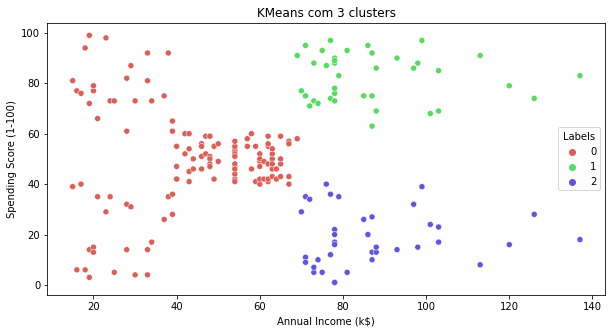

In [19]:
#plotando a ditribuição dos dados com 3 clusters
x['Labels'] = km_3.labels_
plt.figure(figsize=(10, 5))
sea.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=x['Labels'], palette=sns.color_palette('hls', 3))
plt.title('KMeans com 3 clusters')
plt.show()

In [20]:
#testando o modelo com 5 clusters
km_5 = KMeans(n_clusters=5).fit(x)

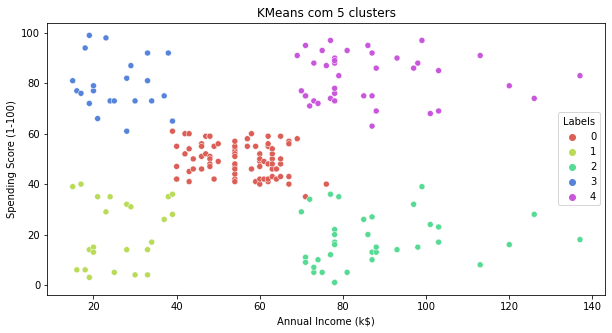

In [21]:
#plotando a ditribuição dos dados com 5 clusters
x['Labels'] = km_5.labels_
plt.figure(figsize=(10, 5))
sea.scatterplot(x['Annual Income (k$)'], x['Spending Score (1-100)'], hue=x['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans com 5 clusters')
plt.show()